## Alumno: Diego AKira Alvarado Arroyo

## Usando Mnist

In [1]:
# Aqui importamos todo lo que usaremos
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

In [2]:
# Cargando el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Convertir imágenes de escala de grises a RGB
x_train = tf.image.grayscale_to_rgb(tf.expand_dims(x_train, axis=-1))
x_test = tf.image.grayscale_to_rgb(tf.expand_dims(x_test, axis=-1))

In [4]:
# Redimensionar imágenes a 48x48 píxeles
x_train = tf.image.resize(x_train, (48, 48))
x_test = tf.image.resize(x_test, (48, 48))

In [5]:
# Normalizar valores de píxeles (escala de 0 a 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# Convertir etiquetas 
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [7]:
# Construyendo el modelo
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [8]:
# Definir la arquitectura del modelo
model = models.Sequential()
model.add(vgg_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [9]:
# Congelar la base convolucional (VGG16)
vgg_base.trainable = False

In [10]:
# Compilando el modelo
model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Entrenando el Modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 241s 256ms/step - accuracy: 0.7702 - loss: 0.7419 - val_accuracy: 0.9543 - val_loss: 0.1545
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 240s 256ms/step - accuracy: 0.9448 - loss: 0.1846 - val_accuracy: 0.9657 - val_loss: 0.1125
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 230s 245ms/step - accuracy: 0.9555 - loss: 0.1409 - val_accuracy: 0.9670 - val_loss: 0.0993
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 235s 250ms/step - accuracy: 0.9607 - loss: 0.1219 - val_accuracy: 0.9728 - val_loss: 0.0891
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 243s 259ms/step - accuracy: 0.9640 - loss: 0.1103 - val_accuracy: 0.9706 - val_loss: 0.0890
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 239s 254ms/step - accuracy: 0.9686 - loss: 0.0997 - val_accuracy: 0.9740 - val_loss: 0.0820
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 236s 252ms/step - accuracy: 0.9683 - loss: 0.0932 - val_accuracy: 0.9699 - val_loss: 0.0897
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 238s 254ms/step - accuracy: 0.9715 -

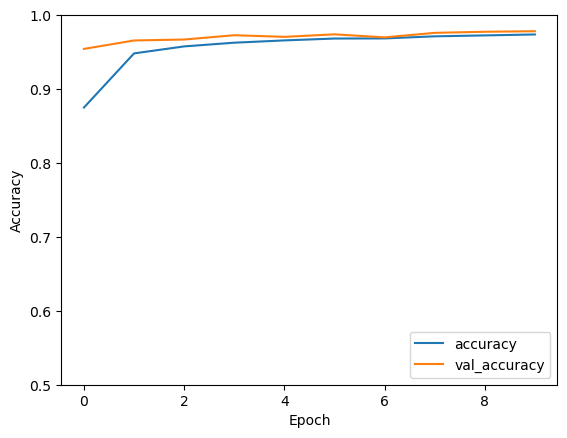

In [13]:
# Graficar el historial de entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()